# **AQI Prediction**

Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

train=pd.read_excel("/content/drive/MyDrive/datasets/AQI_ttnagar_Epics.xlsx")
train.head()

,Date,AQI No.,AQI Status,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
0,2019-10-29,86,Satisfactory,160.05,83.07,10.78,55.73,38.41,1.39,18.16,15.63,53.31,NaN
1,2019-10-30,69,Satisfactory,116.85,57.42,5.85,34.42,23.06,1.01,14.68,13.12,36.17,NaN
2,2019-10-31,161,Moderate,93.18,43.68,9.25,34.32,25.77,1.11,12.85,12.64,40.36,NaN
3,2019-11-01,177,Moderate,162.19,77.20,15.93,38.45,33.41,1.15,8.37,21.93,36.60,NaN
4,2019-11-02,111,Moderate,181.03,74.08,13.59,73.80,50.30,2.09,9.97,14.08,44.61,NaN


Dropping the Categorical features and date

In [ ]:
train = train.drop(["Date"], axis = 1)
train = train.drop(["AQI Status"], axis = 1)
train = train.drop(["Benzene (µg/m3)"], axis = 1)

In [ ]:
train.head()

,AQI No.,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3)
0,86,160.05,83.07,10.78,55.73,38.41,1.39,18.16,15.63,53.31
1,69,116.85,57.42,5.85,34.42,23.06,1.01,14.68,13.12,36.17
2,161,93.18,43.68,9.25,34.32,25.77,1.11,12.85,12.64,40.36
3,177,162.19,77.20,15.93,38.45,33.41,1.15,8.37,21.93,36.60
4,111,181.03,74.08,13.59,73.80,50.30,2.09,9.97,14.08,44.61


Cleaning the NaNs

In [ ]:
train.isna().sum()

AQI No.           0
PM10 (µg/m3)      0
PM2.5 (µg/m3)     3
NO (µg/m3)       29
NO2 (µg/m3)      29
NOX (ppb)        29
CO (mg/m3)        5
SO2 (µg/m3)       0
NH3 (µg/m3)      29
Ozone (µg/m3)     0
dtype: int64

In [ ]:
train = train.dropna()

Random Forest Regressor training

In [ ]:
# importing Randomforest
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# creating model
m1 = RandomForestRegressor(n_estimators=100)

# separating class label and other attributes
train1 = train.drop(['AQI No.'], axis=1)
target = train['AQI No.']

# Fitting the model
m1.fit(train1, target)
m1.score(train1, target) * 100

91.64768680842802

Testing the model

In [ ]:
print(m1.predict([[160.05,	83.07,	10.78,	55.73,	38.41,	1.39,	18.16,	15.63,	53.31]]))

[120.04]


In [ ]:
#m2 = GradientBoostingRegressor()
#m2.fit(train1, target)
#m2.score(train1, target) * 100

64.372647516411

# **Wheather Forecasting**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("/content/drive/MyDrive/datasets/DailyDelhiClimateTrain_delhi_2017.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


Data Analysis


In [ ]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [ ]:
figure = px.line(data, x="date",
                 y="meantemp",
                 title='Mean Temperature in Delhi Over the Years')
figure.show()


In [ ]:
figure = px.line(data, x="date",
                 y="humidity",
                 title='Humidity in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="date",
                 y="wind_speed",
                 title='Wind Speed in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


## Prophet Predictions

Prediction of Mean Temperature



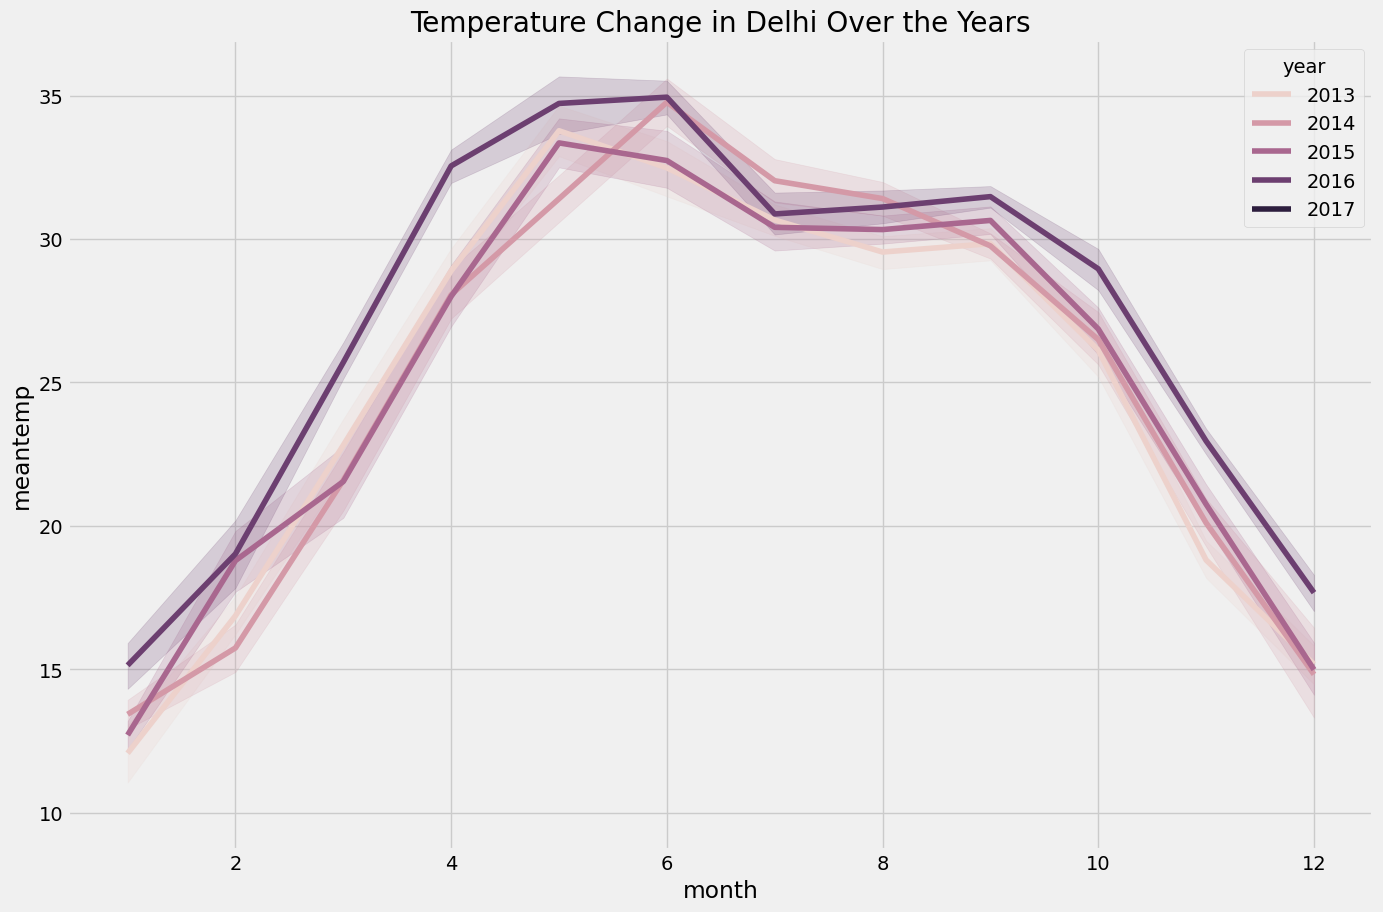

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [ ]:
forecast_data_meanTemp = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
forecast_data_meanTemp.drop(['humidity', 'wind_speed', 'meanpressure'], axis = 1)
print(forecast_data_meanTemp)
#make new fore_cast data variable for humidity and

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data_meanTemp)
forecasts_meanTemp = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts_meanTemp)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ndybrf3/ojwdteiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ndybrf3/bstnif9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35362', 'data', 'file=/tmp/tmp6ndybrf3/ojwdteiw.json', 'init=/tmp/tmp6ndybrf3/bstnif9_.json', 'output', 'file=/tmp/tmp6ndybrf3/prophet_modelptzlhwez/prophet_model-20240429100231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prediction of Humidity

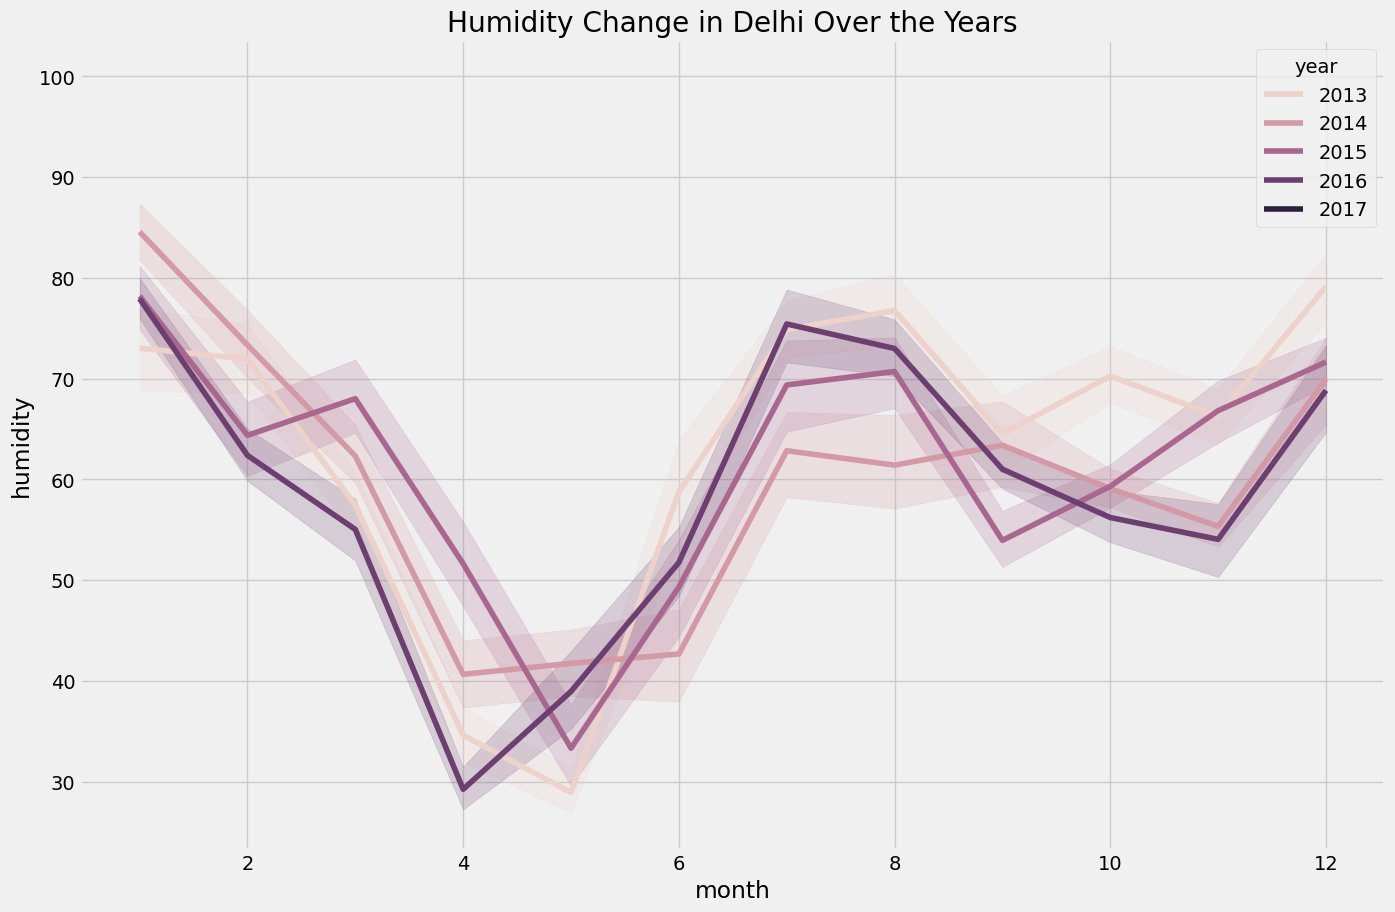

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Humidity Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='humidity', hue='year')
plt.show()

# Specific Date output

Mean Temperature for a specific date

In [ ]:
# Assuming 'specific_date' is the date you want to get the prediction for
print("Enter the date: ")
specific_date = pd.to_datetime(input())

specific_date_prediction = predictions[predictions['ds'] == specific_date]

# Print the prediction for the specific date
if not specific_date_prediction.empty:
    print("Mean Temperature Prediction for {}: {}".format(specific_date, specific_date_prediction['yhat'].values[0]))
else:
    print("No prediction available for the specified date.")

Enter the date: 


KeyboardInterrupt: Interrupted by user